# **LINEAR REGRESSION**

In the last lab, you learn't about the Exploratory Data Analysis (EDA) which have a lot of importance before performing any task on the data. Afterwards, you did linear regression using the Ordinary Least Squares (OLS) method.

In this lab, you would perform **Linear Regression** on various datasets using **Gradient Descent** Method.

**DATA SETS**

From your last lab's knowledge you know that any dataset from real world can be imported as a **Dataframe** and be processed on.

But, this time direclty import the datasets from the scikit module.
Yes, scikit-learn has some inbuilt-datasets too. These however are small datasets for experimentations and learning as you would do now.

---
Refer the following links to import the respective datasets

[**Diabetes Dataset**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes)

[**California Housing Dataset**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing)


**TASK 1**:



1.   Import these Datasets in your notebook.
2.   Treat the last column of the datasets as the Depedent Variable (Y) with the other columns as Independent variables.
1.  Do the sufficient EDA as per your needs with justifiable reasonings.







In [5]:
#importing all necessary modules 
import sklearn as sk
import matplotlib
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

In [23]:
x, y = fetch_california_housing(return_X_y=True, as_frame=True)


In [25]:
df_parttwo = x.copy()
df_parttwo["target"] = y

In [27]:
df_parttwo.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [29]:
df_parttwo.shape

(20640, 9)

In [33]:
#seeing boxplot for outliers
import seaborn as sns
import matplotlib.pyplot as plt

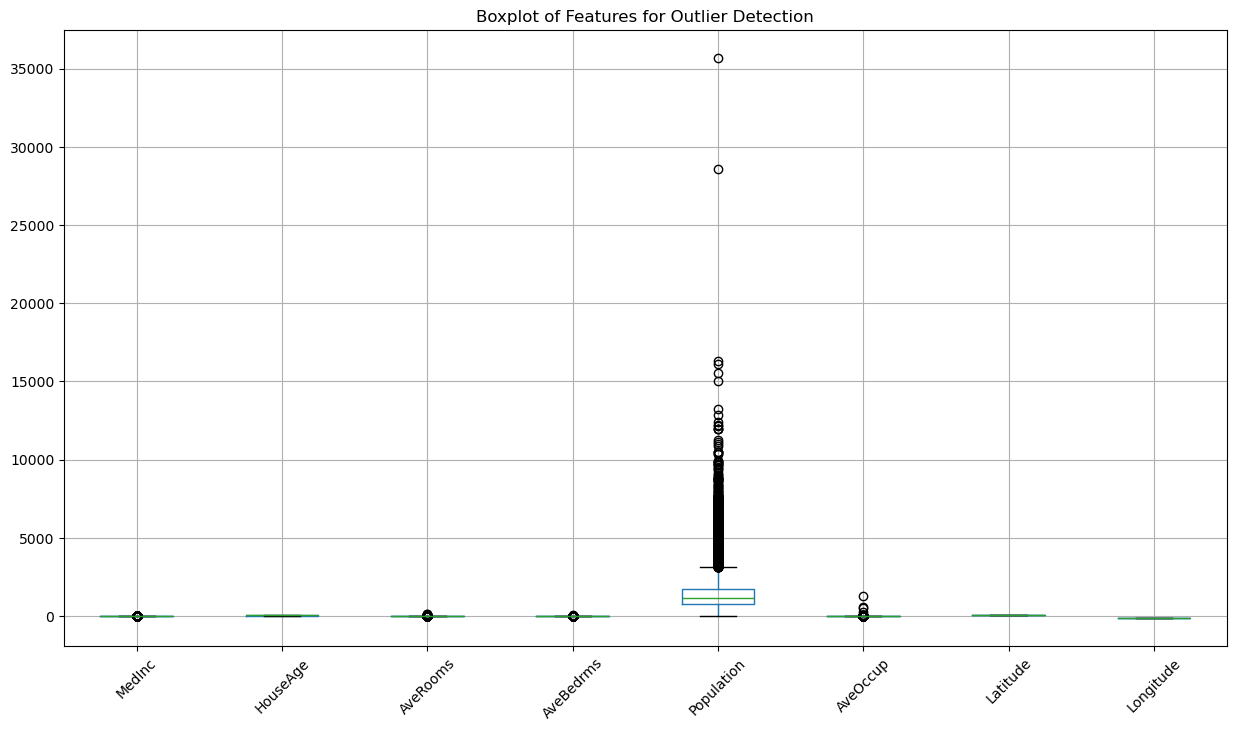

In [35]:
plt.figure(figsize=(15, 8))
df_parttwo.drop(columns=["target"]).boxplot(rot=45)
plt.title("Boxplot of Features for Outlier Detection")
plt.show()

In [41]:
# removing population more than 15000
df2 = df_parttwo[df_parttwo["Population"] <= 12000]

In [43]:
df2.shape

(20629, 9)

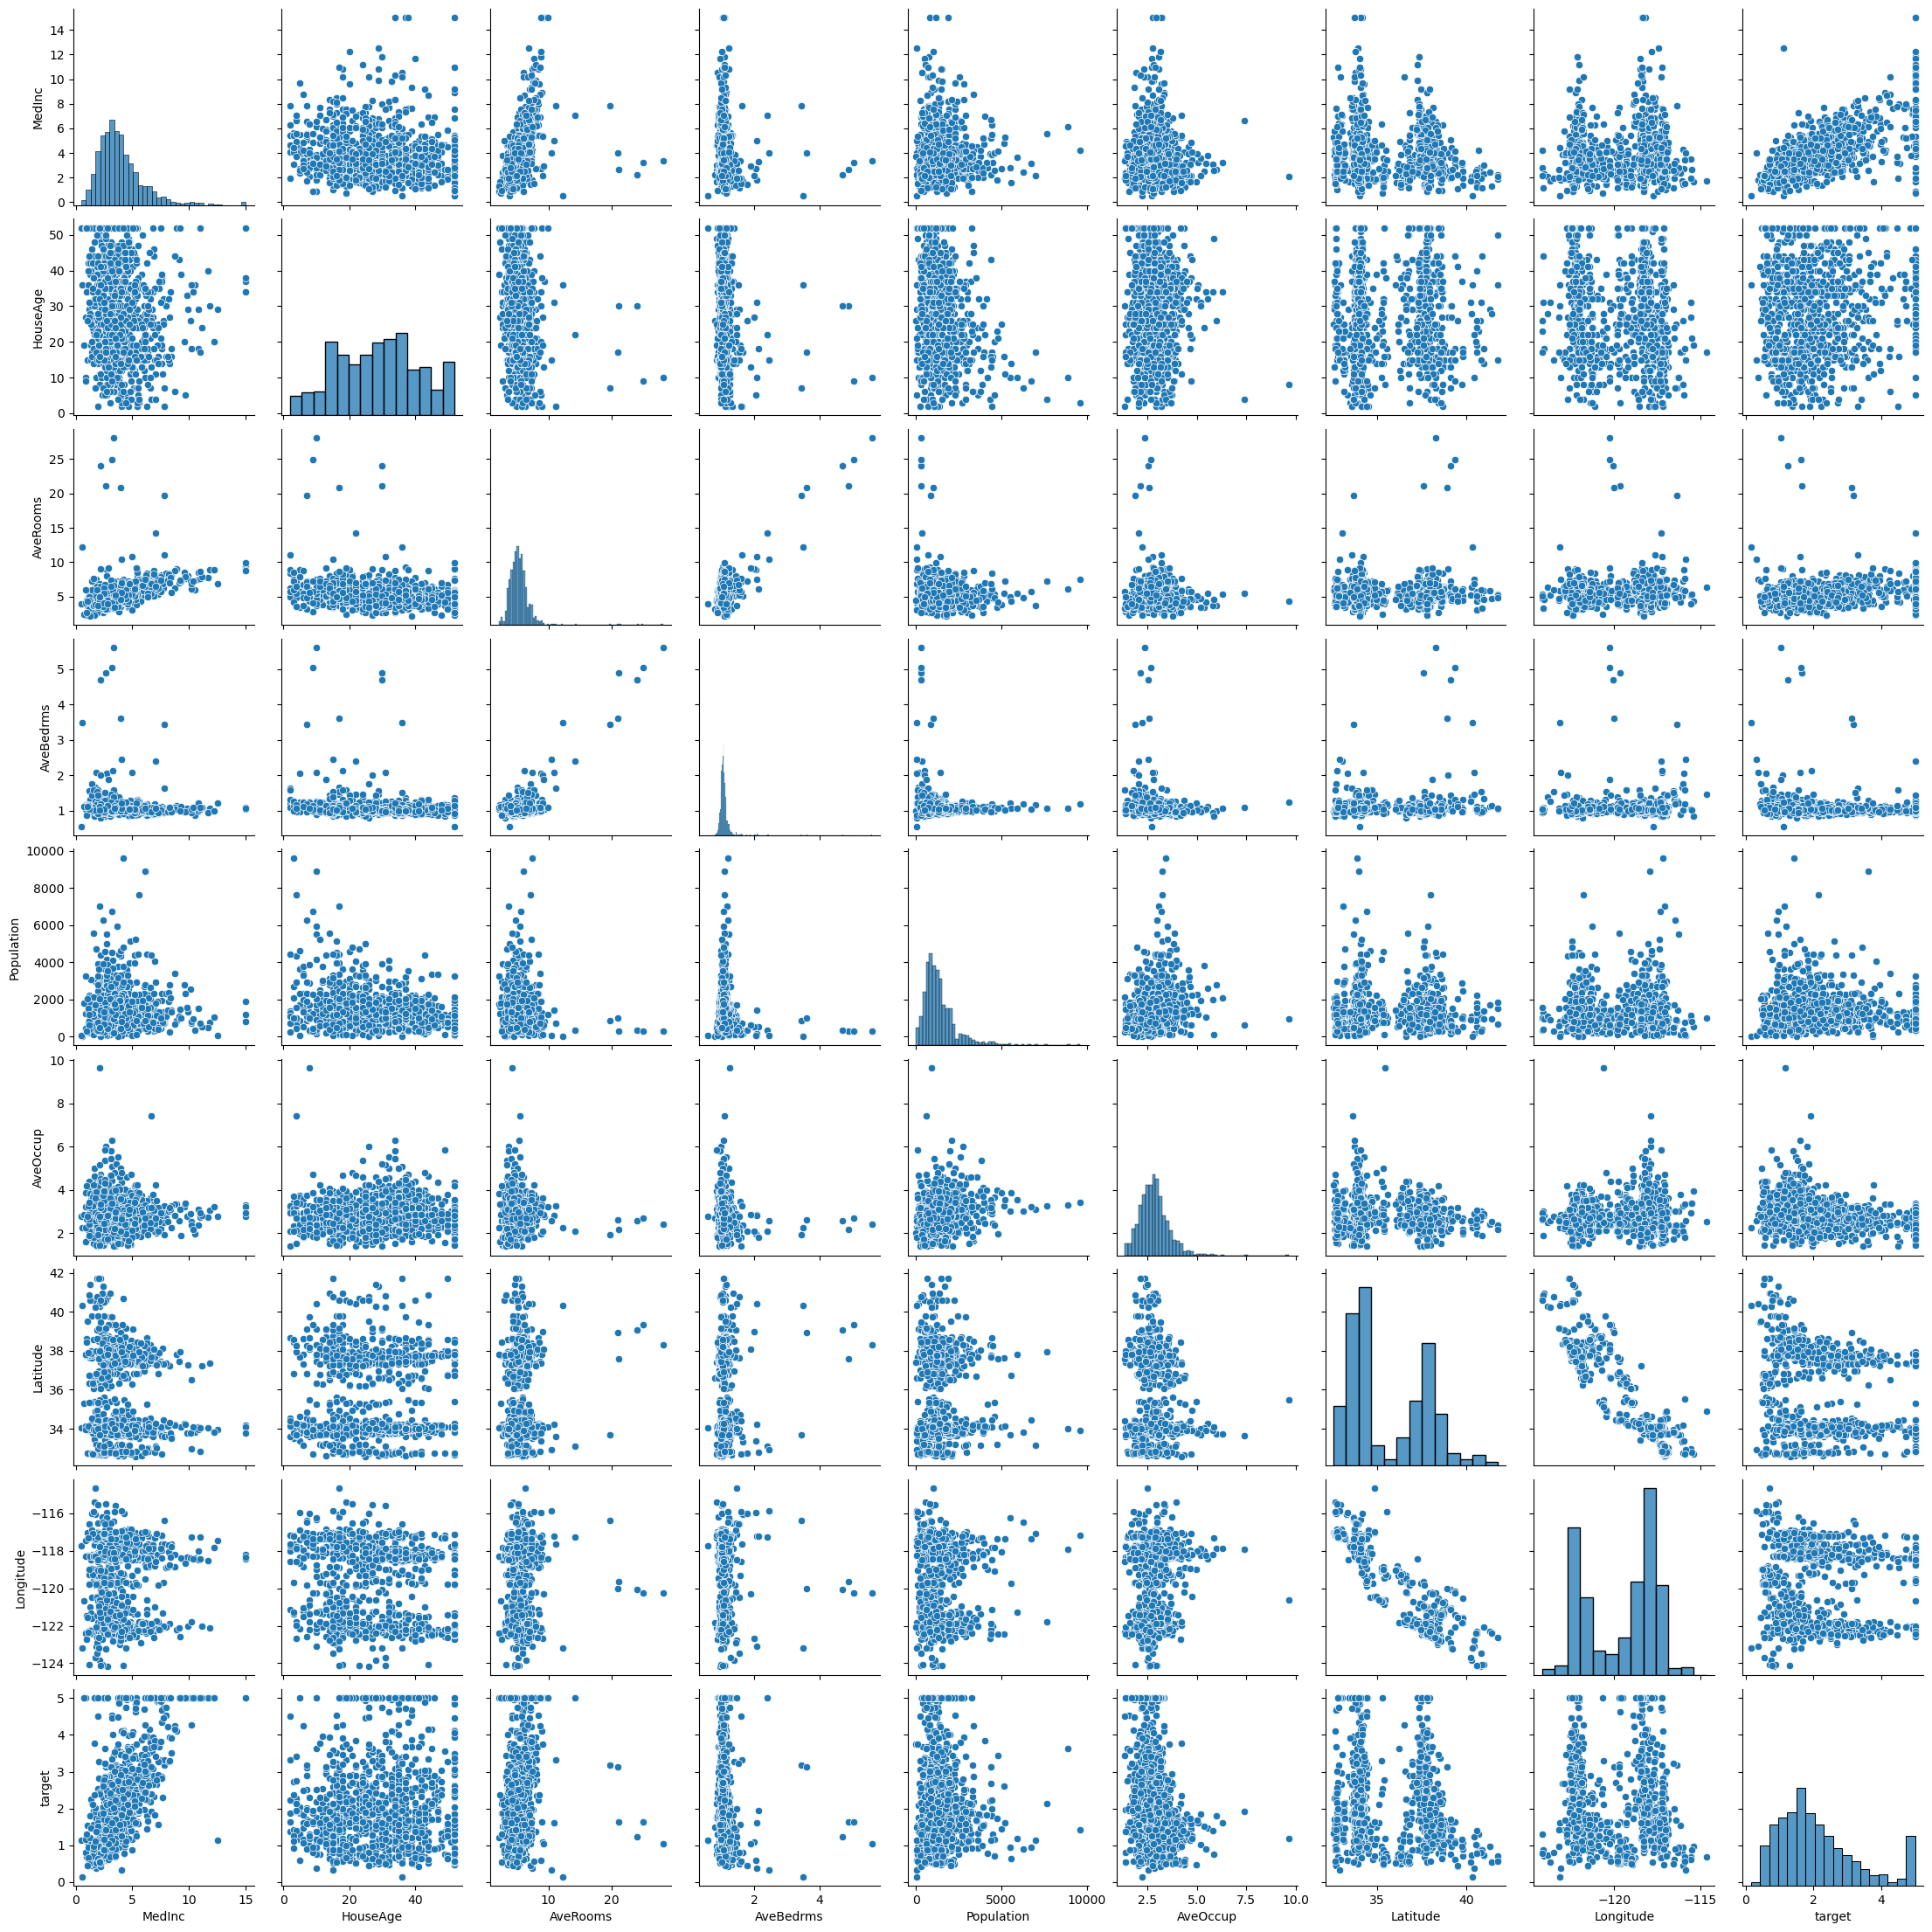

In [47]:
sns.pairplot(df2.sample(1000))
plt.show()

In [49]:
df2.skew()

MedInc         1.647987
HouseAge       0.060397
AveRooms      20.698903
AveBedrms     31.308856
Population     2.844141
AveOccup      97.615260
Latitude       0.465787
Longitude     -0.297862
target         0.978287
dtype: float64

# It is seen above that AveRooms, AveBedrms, AveOccup are heavily skewed, we will take log transformations to see

In [57]:
df3 = df2
df3['AveRooms'] = np.log1p(df3['AveRooms'])
df3['AveBedrms'] = np.log1p(df3['AveBedrms'])
df3['AveOccup'] = np.log1p(df3['AveOccup'])
df3['Population'] = np.log1p(df3['Population'])
df3['MedInc'] = np.log1p(df3['MedInc'])

/var/folders/j_/29qwsz_x0vq2hsxyv0_51msw0000gn/T/ipykernel_8033/3331413363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['AveRooms'] = np.log1p(df3['AveRooms'])
/var/folders/j_/29qwsz_x0vq2hsxyv0_51msw0000gn/T/ipykernel_8033/3331413363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['AveBedrms'] = np.log1p(df3['AveBedrms'])
/var/folders/j_/29qwsz_x0vq2hsxyv0_51msw0000gn/T/ipykernel_8033/3331413363.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [63]:
df3.skew()

MedInc        0.226174
HouseAge      0.060397
AveRooms      0.335902
AveBedrms     5.162268
Population   -1.645633
AveOccup      0.960086
Latitude      0.465787
Longitude    -0.297862
target        0.978287
dtype: float64

# some are still skewed, let us apply other method to make it better for AveBedrms and Population

In [61]:
df3['AveBedrms'] = np.sqrt(df3['AveBedrms'])
df3['Population'] = np.sqrt(df3['Population'])

/var/folders/j_/29qwsz_x0vq2hsxyv0_51msw0000gn/T/ipykernel_8033/43121481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['AveBedrms'] = np.sqrt(df3['AveBedrms'])
/var/folders/j_/29qwsz_x0vq2hsxyv0_51msw0000gn/T/ipykernel_8033/43121481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Population'] = np.sqrt(df3['Population'])


In [65]:
df3.skew()

MedInc        0.226174
HouseAge      0.060397
AveRooms      0.335902
AveBedrms     5.162268
Population   -1.645633
AveOccup      0.960086
Latitude      0.465787
Longitude    -0.297862
target        0.978287
dtype: float64

In [67]:
from scipy.stats import boxcox
df3['AveBedrms'], _ = boxcox(df3['AveBedrms'] + 1)
df3.skew()

/var/folders/j_/29qwsz_x0vq2hsxyv0_51msw0000gn/T/ipykernel_8033/410054224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['AveBedrms'], _ = boxcox(df3['AveBedrms'] + 1)


MedInc        0.226174
HouseAge      0.060397
AveRooms      0.335902
AveBedrms    -1.830098
Population   -1.645633
AveOccup      0.960086
Latitude      0.465787
Longitude    -0.297862
target        0.978287
dtype: float64

In [69]:
df3['Population'], _ = boxcox(df3['Population'] + 1)
df3.skew()

/var/folders/j_/29qwsz_x0vq2hsxyv0_51msw0000gn/T/ipykernel_8033/747086470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Population'], _ = boxcox(df3['Population'] + 1)


MedInc        0.226174
HouseAge      0.060397
AveRooms      0.335902
AveBedrms    -1.830098
Population    0.128763
AveOccup      0.960086
Latitude      0.465787
Longitude    -0.297862
target        0.978287
dtype: float64

In [99]:
df3.fillna(df3.median(), inplace=True)

/var/folders/j_/29qwsz_x0vq2hsxyv0_51msw0000gn/T/ipykernel_8033/2874662160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.fillna(df3.median(), inplace=True)


In [101]:
df3.skew()

MedInc        0.226174
HouseAge      0.060397
AveRooms      0.335902
AveBedrms    -1.830098
Population    0.128763
AveOccup      0.960086
Latitude      0.465787
Longitude    -0.297862
target        0.978287
dtype: float64

**TASK 2**:


1.   Split the data into Train (85%) and Test Set (15%).




In [103]:
#importing necessary stuff for this task 
from sklearn.model_selection import train_test_split as tt

In [105]:
X_housing = df3.drop(['target'], axis = 'columns')
Y_housing = df3['target']

In [107]:
xtrain_housing, xtest_housing, ytrain_housing, ytest_housing = tt(X_housing, Y_housing, test_size = 0.15, random_state = 42)

In [109]:
xtrain_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
10504,1.576977,21.0,1.019829,0.082423,1318.252818,0.788225,33.47,-117.70
3190,1.820153,7.0,1.004939,0.082377,881.895602,0.887503,36.29,-119.80
10884,1.993707,15.0,1.168006,0.082426,832.908893,0.984627,33.71,-117.90
11233,1.566885,32.0,1.034536,0.082422,1607.998167,0.853522,33.82,-117.96
4983,1.130046,52.0,1.010420,0.082424,1373.336080,0.843290,34.00,-118.30


In [111]:
xtrain_housing.shape

(17534, 8)

In [113]:
xtest_housing.shape

(3095, 8)

In [115]:
ytrain_housing.head()

10504    3.500
3190     1.075
10884    3.052
11233    1.974
4983     1.164
Name: target, dtype: float64

In [117]:
ytrain_housing.shape

(17534,)

In [119]:
ytest_housing.shape

(3095,)

**TASK 3**


1.   Implement a Linear Regression Model with Stochastic Gradient Descent Method.
2.   The implementation of the stochastic gradient descent method should be as per the method taught in the theory class. Make sure the update rule's implementation should be done by you **(No inbuilt direct function should be used for this task).**
3.   Try different values of the learning rates and epochs. Understand their effects on the training process.
4.   Make sure to have multiple 2D plots for the loss function w.r.t. Iterations and Epochs for different learning rates.



In [121]:
import matplotlib.pyplot as plt

In [123]:
def initialize_weights(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias
# Compute Mean Squared Error (MSE)
def compute_loss(X, Y, weights, bias):
    y_pred = np.dot(X, weights) + bias
    loss = np.mean((Y - y_pred) ** 2)
    return loss

In [125]:
def stochastic_gradient_descent(X, Y, learning_rate=0.01, epochs=100):
    n_samples, n_features = X.shape
    weights, bias = initialize_weights(n_features)
    
    loss_history = []  # Store loss values for plotting

    for epoch in range(epochs):
        for i in range(n_samples):
            xi = X[i]
            yi = Y[i]
            
            # Prediction
            y_pred = np.dot(xi, weights) + bias
            
            # Compute gradients
            error = y_pred - yi
            dW = xi * error
            dB = error
            
            # Update weights and bias
            weights -= learning_rate * dW
            bias -= learning_rate * dB
            
        # Compute loss after each epoch
        loss = compute_loss(X, Y, weights, bias)
        loss_history.append(loss)

    return weights, bias, loss_history


/var/folders/j_/29qwsz_x0vq2hsxyv0_51msw0000gn/T/ipykernel_8033/152351184.py:17: RuntimeWarning: overflow encountered in multiply
  dW = xi * error
/var/folders/j_/29qwsz_x0vq2hsxyv0_51msw0000gn/T/ipykernel_8033/152351184.py:21: RuntimeWarning: invalid value encountered in subtract
  weights -= learning_rate * dW
/var/folders/j_/29qwsz_x0vq2hsxyv0_51msw0000gn/T/ipykernel_8033/152351184.py:22: RuntimeWarning: invalid value encountered in scalar subtract
  bias -= learning_rate * dB


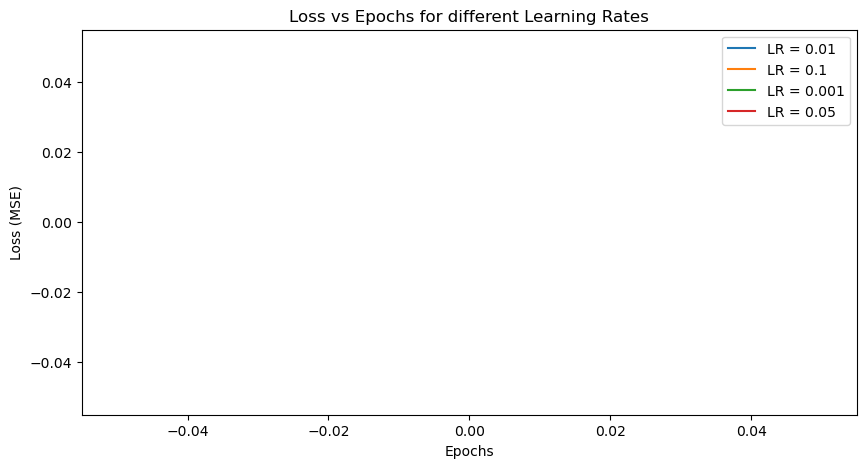

In [127]:
learning_rates = [0.01, 0.1, 0.001, 0.05]
epochs = 100
plt.figure(figsize=(10, 5))

for lr in learning_rates:
    _, _, loss_hist = stochastic_gradient_descent(xtrain_housing.values, ytrain_housing.values, learning_rate=lr, epochs=epochs)
    plt.plot(range(epochs), loss_hist, label=f'LR = {lr}')

plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Loss vs Epochs for different Learning Rates')
plt.legend()
plt.show()

# the above suggests that weights are tending to infinity hence we need to scale our data

In [139]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
xtrain_housing = pd.DataFrame(scaler.fit_transform(xtrain_housing), columns=X_housing.columns)
xtest_housing = pd.DataFrame(scaler.transform(xtest_housing), columns=X_housing.columns)
xtrain_housing.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.166109,-0.605388,-0.207709,-0.056104,-0.434314,-0.760766,-1.016452,0.938321
1,0.843943,-1.715141,-0.394232,-2.834440,-1.617773,0.437879,0.303083,-0.108773
2,1.327712,-1.080996,1.648536,0.155207,-1.750632,1.610524,-0.904151,0.838598
3,0.137980,0.266561,-0.023470,-0.080912,0.351514,0.027608,-0.852680,0.808681
4,-1.079675,1.851923,-0.325574,0.019167,-0.284921,-0.095931,-0.768454,0.639151


In [141]:
xtrain_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.166109,-0.605388,-0.207709,-0.056104,-0.434314,-0.760766,-1.016452,0.938321
1,0.843943,-1.715141,-0.394232,-2.834440,-1.617773,0.437879,0.303083,-0.108773
2,1.327712,-1.080996,1.648536,0.155207,-1.750632,1.610524,-0.904151,0.838598
3,0.137980,0.266561,-0.023470,-0.080912,0.351514,0.027608,-0.852680,0.808681
4,-1.079675,1.851923,-0.325574,0.019167,-0.284921,-0.095931,-0.768454,0.639151


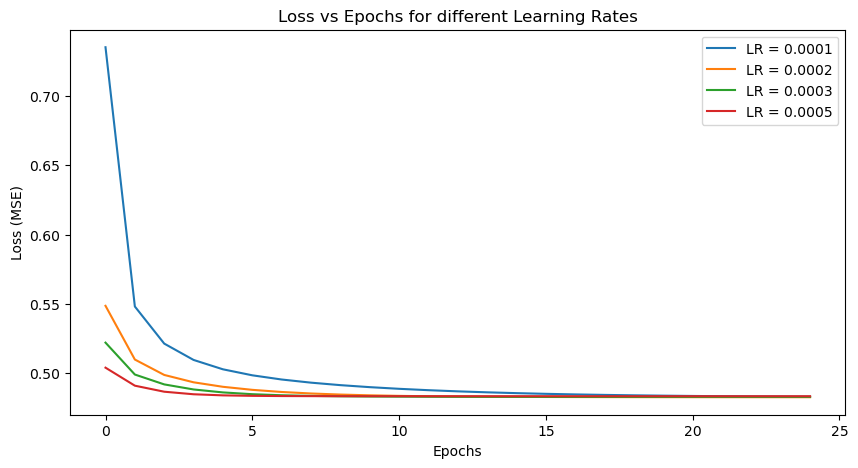

In [147]:
learning_rates = [0.0001, 0.0002, 0.0003, 0.0005]
epochs = 25
plt.figure(figsize=(10, 5))

for lr in learning_rates:
    _, _, loss_hist = stochastic_gradient_descent(xtrain_housing.values, ytrain_housing.values, learning_rate=lr, epochs=epochs)
    plt.plot(range(epochs), loss_hist, label=f'LR = {lr}')

plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Loss vs Epochs for different Learning Rates')
plt.legend()
plt.show()

**TASK 4**:
  

1.   Test the above model on the Test set as already split above.
2.   Report the final performance metrics (RMSE, MAE,R² ).



In [149]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [151]:
def predict(X, weights, bias):
    return np.dot(X, weights) + bias

In [153]:
weights, bias, _ = stochastic_gradient_descent(xtrain_housing.values, ytrain_housing.values, learning_rate=0.0005, epochs=20)
y_pred = predict(xtest_housing.values, weights, bias)

rmse = np.sqrt(mean_squared_error(ytest_housing.values, y_pred))
mae = mean_absolute_error(ytest_housing.values, y_pred)
r2 = r2_score(ytest_housing.values, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Root Mean Squared Error (RMSE): 0.7139
Mean Absolute Error (MAE): 0.5313
R² Score: 0.6216


In [157]:
# we can also compute for different epochs 
results = []
for epochs in [10, 13, 15, 20, 27, 35, 40, 45, 50]:
    weights, bias, _ = stochastic_gradient_descent(xtrain_housing.values, ytrain_housing.values, learning_rate=0.0005, epochs=epochs)
    y_pred = np.dot(xtest_housing.values, weights) + bias
    
    rmse = np.sqrt(mean_squared_error(ytest_housing.values, y_pred))
    mae = mean_absolute_error(ytest_housing.values, y_pred)
    r2 = r2_score(ytest_housing.values, y_pred)
    
    results.append([epochs, rmse, mae, r2])
df_results_housing = pd.DataFrame(results, columns=['epochs', 'rmse', 'mae', 'r^2'])
df_results_housing

,epochs,rmse,mae,r^2
0,10,0.713943,0.531184,0.621500
1,13,0.713897,0.531235,0.621549
2,15,0.713887,0.531248,0.621560
3,20,0.713881,0.531257,0.621566
4,27,0.713881,0.531258,0.621567
5,35,0.713881,0.531258,0.621567
6,40,0.713881,0.531258,0.621567
7,45,0.713881,0.531258,0.621567
8,50,0.713881,0.531258,0.621567


**TASK 5**:
  

1.   Do the same once again, but this time use the inbuilt gradient descent algorithm (**SGDRegressor**).
2.   And compare the performance metrics (RMSE, MAE, R² ) with your own implementation of Gradient Descent as attained above.



In [161]:
from sklearn.linear_model import SGDRegressor

results2 = []
for epochs in [10, 13, 15, 20, 27, 35, 40, 45, 50]:
    sgd = SGDRegressor(max_iter=epochs, learning_rate='constant', eta0=0.0005, random_state=42)
    sgd.fit(xtrain_housing, ytrain_housing)
    y_pred_sklearn = sgd.predict(xtest_housing)

    RMSE_SGDRegressor_housing = np.sqrt(mean_squared_error(ytest_housing, y_pred_sklearn))
    MAE_SGDRegressor_housing =  mean_absolute_error(ytest_housing, y_pred_sklearn)
    R2_SGDRegressor_housing =  r2_score(ytest_housing, y_pred_sklearn)
    results2.append([epochs, RMSE_SGDRegressor_housing, MAE_SGDRegressor_housing, R2_SGDRegressor_housing])

df_inbuilt_housing = pd.DataFrame(results2, columns = ['epochs', 'rmse', 'mae', 'r^2'])
# results2.columns = ['epochs', 'rmse', 'mae', 'r^2'] 
df_inbuilt_housing

,epochs,rmse,mae,r^2
0,10,0.713695,0.530314,0.621764
1,13,0.713695,0.530314,0.621764
2,15,0.713695,0.530314,0.621764
3,20,0.713695,0.530314,0.621764
4,27,0.713695,0.530314,0.621764
5,35,0.713695,0.530314,0.621764
6,40,0.713695,0.530314,0.621764
7,45,0.713695,0.530314,0.621764
8,50,0.713695,0.530314,0.621764


**TASK 6**:


1.   The above tasks should be done for both the datasets as imported in *Task 1*.
2.   And, you must analyze the difference in the results that you get in *Task 4* and *Task 5*.



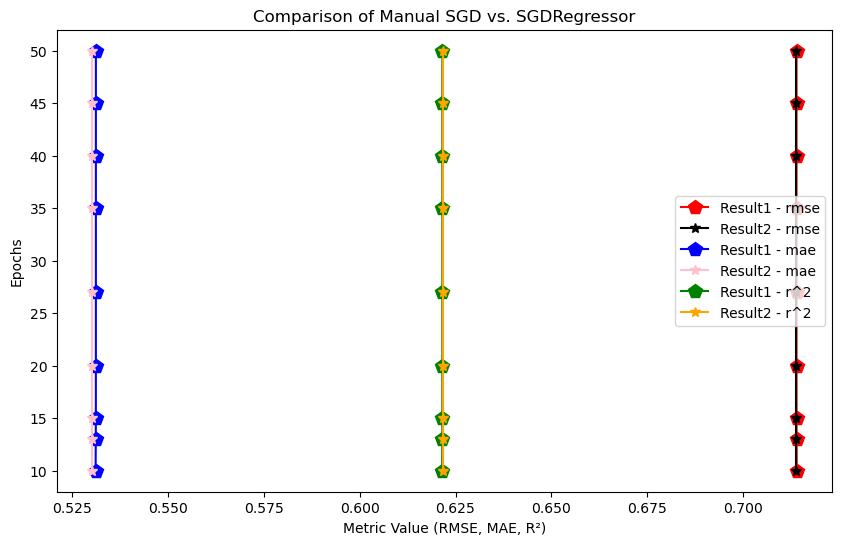

In [163]:
plt.figure(figsize=(10, 6))
metrics = ['rmse', 'mae', 'r^2']
colors = ['red', 'blue', 'green']
colors2 = ['black', 'pink', 'orange']
marker = 'p'
marker2 = '*'
for i, metric in enumerate(metrics):
    plt.plot(df_results_housing[metric], df_results_housing['epochs'], label=f'Result1 - {metric}', 
             color=colors[i], marker=marker, markersize = 10)
    plt.plot(df_inbuilt_housing[metric], df_inbuilt_housing['epochs'], label=f'Result2 - {metric}', 
             color=colors2[i], marker=marker2, markersize = 7)

plt.xlabel("Metric Value (RMSE, MAE, R²)")
plt.ylabel("Epochs")
plt.title("Comparison of Manual SGD vs. SGDRegressor")
plt.legend()
plt.show()